In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
from scipy.optimize import curve_fit
from scipy import integrate
import natural_cubic_spline_stack_overflow as ncs
import dynamic_stock_model as dsm 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
DSM = pd.read_csv("Model/DSM_V2.csv")
DSM = DSM.set_index('Unnamed: 0')
DSM.index.name = None
display(DSM)

,Population,Stock,Stock per capita,Stock change,Inflow,Outflow,Stock AB,Stock MFH,Stock SFH,Stock TH
1600,2.937747e+05,1.014099e+06,3.451961,NaN,NaN,NaN,1.255182e+02,4.083741e+05,2.022826e+05,4.033166e+05
1601,2.989405e+05,1.014384e+06,3.393264,284.936764,NaN,NaN,0.000000e+00,4.057034e+05,2.001224e+05,4.085580e+05
1602,3.041969e+05,1.014675e+06,3.335585,290.693093,NaN,NaN,0.000000e+00,4.029968e+05,1.979511e+05,4.137266e+05
1603,3.095455e+05,1.014971e+06,3.278907,296.565622,NaN,NaN,0.000000e+00,4.003046e+05,1.957938e+05,4.188726e+05
1604,3.149880e+05,1.015274e+06,3.223213,302.556693,NaN,NaN,0.000000e+00,3.976270e+05,1.936505e+05,4.239961e+05
...,...,...,...,...,...,...,...,...,...,...
2046,5.536865e+07,2.916042e+07,0.526659,150096.897833,NaN,NaN,1.531559e+06,1.056326e+07,1.415238e+07,2.913227e+06
2047,5.544026e+07,2.930911e+07,0.528661,148691.824280,NaN,NaN,1.553133e+06,1.069135e+07,1.432591e+07,2.738723e+06
2048,5.551080e+07,2.945639e+07,0.530643,147277.022879,NaN,NaN,1.574817e+06,1.082002e+07,1.450014e+07,2.561412e+06
2049,5.558029e+07,2.960224e+07,0.532603,145853.239211,NaN,NaN,1.596610e+06,1.094926e+07,1.467507e+07,2.381307e+06


,No. of completions by private enterprise,No. of completions by social housing developers,"Of which, no. of completions by local authorities","Of which, no. of completions by housing associations",Total completions,Percentage of total completions by private enterprise,Percentage of total completions by social housing developers,"Of which, percentage of completions by local authorities","Of which, percentage of completions by housing associations"
Year,,,,,,,,,
1946,28760,20500,20400,100,49250,0.583959,0.416244,0.414213,0.00203
1947,38630,82230,81370,860,120860,0.319626,0.680374,0.673258,0.007116
1948,30370,163220,161400,1820,193590,0.156878,0.843122,0.833721,0.009401
1949,23800,138310,136980,1330,162110,0.146814,0.853186,0.844982,0.008204
1950,25310,138030,136530,1500,163340,0.154953,0.845047,0.835864,0.009183
...,...,...,...,...,...,...,...,...,...
2018,135210,30280,2690,27590,165490,0.817028,0.182972,0.016255,0.166717
2019,143690,34190,2190,32000,177880,0.807792,0.192208,0.012312,0.179897
2020,120030,26590,1270,25320,146620,0.818647,0.181353,0.008662,0.172691


,Net add
1946,64259.602947
1947,157693.718014
1948,252589.168213
1949,211515.212868
1950,213120.071987
...,...
2018,215925.313537
2019,232091.333446
2020,191304.426073
2021,228255.328722


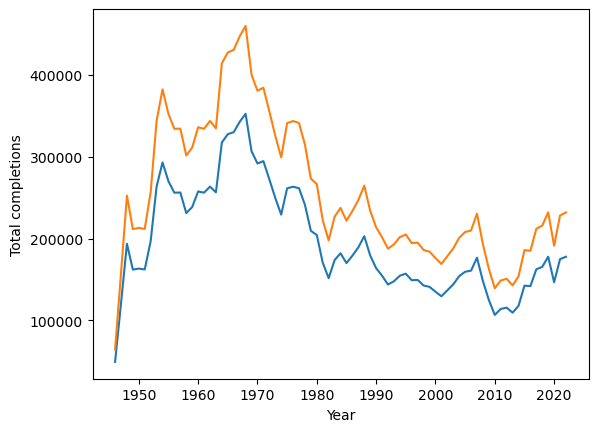

1.30476351161352


In [3]:
file = "Data/ONS/CBP07671---Housing-supply---Historical-statistics-for-the-UK.xlsx"
sheet = "HB.E"
Inflow = pd.read_excel(file,sheet_name=sheet)
Inflow.columns = Inflow.loc[0,:]
Inflow = Inflow.drop(index=0)
Inflow = Inflow.drop(columns=['Notes','Total'])
Inflow = Inflow.set_index('Year')
display(Inflow)

Total_net_add = pd.DataFrame(Inflow.loc[:,'Total completions'].copy(deep=True))
Total_net_add = Total_net_add.rename(columns={'Total completions':'Net add'})
Total_net_add.index.name = None

ratio = 0.16431673850261094
total = 1+ratio
total = 1.30476351161352 # COMPARING 2022 NUMBERS 
for i in Total_net_add.index:
    Total_net_add.loc[i,'Net add'] = Total_net_add.loc[i,'Net add']*total
display(Total_net_add)

sns.lineplot(Inflow,x=Inflow.index,y='Total completions')
sns.lineplot(Total_net_add,x=Total_net_add.index,y='Net add')
plt.show()

"""
def logistic(x:np.ndarray,ti:float,tau:float,C0:float,C1:float) -> np.ndarray:
    #General logistic function.
    #Arguments:
    #- x: np.ndarray of observation points (time)
    #- ti: inflection time
    #- tau: transition time coefficient
    #- C0: start value
    #- C1: end value
    #Returns:
    #- np.ndarray with len(x) number of points
    return (C1 - C0)/(1 + np.exp(-(x - ti) / tau)) + C0  

inputs = Inflow.index
outputs = Inflow["Total completions"]
pred_inputs = Inflow.index

popt, pcov = curve_fit(logistic, inputs, outputs, bounds = ([min(inputs), 0, 10**3, 10**6], [max(inputs), 10**5, 10**6, 10**8]))
pred_outputs = logistic(pred_inputs, *popt)
print(f'The optimal choice of parameters for the logistic function, given the sample data, is {popt} (ti, tau, C0, C1).')
fig=plt.figure(figsize = (16,8))
plt.plot(inputs, outputs, 's', color = 'crimson', markersize = 1, label = f'original values')
plt.plot(pred_inputs, pred_outputs, color = 'orange', lw = 2, label = 'logistic regression values')
plt.legend(loc = 'best')
plt.show()

#DSM["Population"] = pred_outputs
display(DSM)
"""

print(232000/177810)

,Population,Stock,Stock per capita,Stock change,Inflow,Outflow,Stock AB,Stock MFH,Stock SFH,Stock TH
1944,4.038145e+07,1.114194e+07,0.275917,148562.260786,NaN,NaN,1.436869e+05,1.844892e+06,2.214785e+06,6.938576e+06
1945,4.061123e+07,1.129191e+07,0.278049,149968.259195,NaN,NaN,1.491092e+05,1.884803e+06,2.269129e+06,6.988867e+06
1946,4.083958e+07,1.144327e+07,0.280201,151363.846331,64259.602947,-87104.243384,1.546610e+05,1.925483e+06,2.324553e+06,7.038575e+06
1947,4.106645e+07,1.159602e+07,0.282372,152748.263284,157693.718014,4945.454730,1.603443e+05,1.966943e+06,2.381068e+06,7.087665e+06
1948,4.129185e+07,1.175014e+07,0.284563,154120.745161,252589.168213,98468.423053,1.661608e+05,2.009189e+06,2.438688e+06,7.136103e+06
...,...,...,...,...,...,...,...,...,...,...
2021,5.319271e+07,2.502529e+07,0.470465,179807.532958,228255.328722,48447.795763,1.033372e+06,7.576332e+06,1.008423e+07,6.331352e+06
2022,5.329534e+07,2.520418e+07,0.472915,178895.530563,232000.000000,53104.469437,1.051603e+06,7.686928e+06,1.023554e+07,6.230107e+06
2023,5.339656e+07,2.538214e+07,0.475352,177954.891020,NaN,NaN,1.069988e+06,7.798333e+06,1.038792e+07,6.125897e+06
2024,5.349639e+07,2.555912e+07,0.477773,176986.289472,NaN,NaN,1.088526e+06,7.910540e+06,1.054134e+07,6.018718e+06


<AxesSubplot:ylabel='Stock change'>

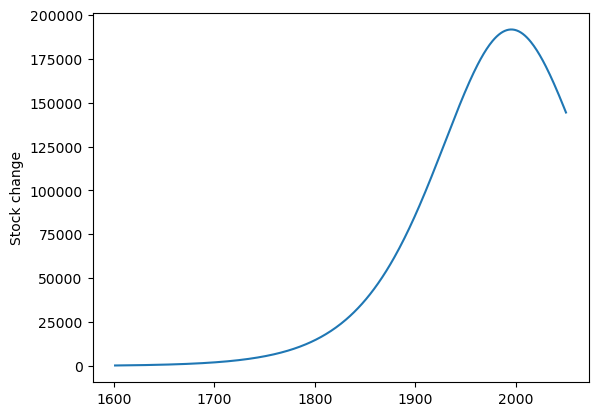

In [4]:
#for i in Inflow.index:
#    DSM.loc[i,'Inflow'] = Inflow.loc[i,'Total completions']
#    DSM.loc[i,'Outflow'] = DSM.loc[i,'Inflow']-DSM.loc[i,'Stock change']

for i in Total_net_add.index:
    DSM.loc[i,'Inflow'] = Total_net_add.loc[i,'Net add']
    DSM.loc[i,'Outflow'] = DSM.loc[i,'Inflow']-DSM.loc[i,'Stock change']

display(DSM.loc[1944:2025,:])

sns.lineplot(DSM,x=DSM.index,y='Stock change')

,Population,Stock,Stock per capita,Stock change,Inflow,Outflow,Stock AB,Stock MFH,Stock SFH,Stock TH
1946,4.083958e+07,1.144327e+07,0.280201,151363.846331,64259.602947,-87104.243384,1.546610e+05,1.925483e+06,2.324553e+06,7.038575e+06
1947,4.106645e+07,1.159602e+07,0.282372,152748.263284,157693.718014,4945.454730,1.603443e+05,1.966943e+06,2.381068e+06,7.087665e+06
1948,4.129185e+07,1.175014e+07,0.284563,154120.745161,252589.168213,98468.423053,1.661608e+05,2.009189e+06,2.438688e+06,7.136103e+06
1949,4.151574e+07,1.190562e+07,0.286774,155480.521805,211515.212868,56034.691063,1.721124e+05,2.052233e+06,2.497425e+06,7.183852e+06
1950,4.173810e+07,1.206245e+07,0.289003,156826.818549,213120.071987,56293.253437,1.782009e+05,2.096081e+06,2.557290e+06,7.230876e+06
...,...,...,...,...,...,...,...,...,...,...
2018,5.287630e+07,2.448325e+07,0.463029,182365.200571,215925.313537,33560.112966,9.796196e+05,7.249492e+06,9.636780e+06,6.617355e+06
2019,5.298321e+07,2.466479e+07,0.465521,181543.003013,232091.333446,50548.330433,9.973787e+05,7.357606e+06,9.784834e+06,6.524970e+06
2020,5.308867e+07,2.484548e+07,0.468000,180690.238324,191304.426073,10614.187749,1.015297e+06,7.466556e+06,9.933989e+06,6.429638e+06
2021,5.319271e+07,2.502529e+07,0.470465,179807.532958,228255.328722,48447.795763,1.033372e+06,7.576332e+06,1.008423e+07,6.331352e+06


<AxesSubplot:ylabel='Inflow'>

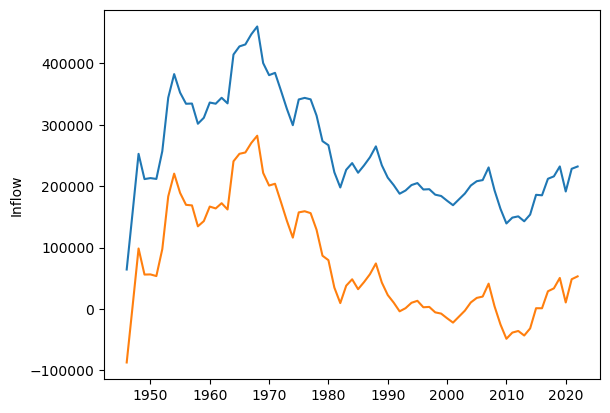

In [5]:
DSM_partial = DSM.loc[1946:2022,:].copy(deep=True)
display(DSM_partial)

sns.lineplot(DSM_partial,x=DSM_partial.index,y='Inflow')
sns.lineplot(DSM_partial,x=DSM_partial.index,y='Outflow')

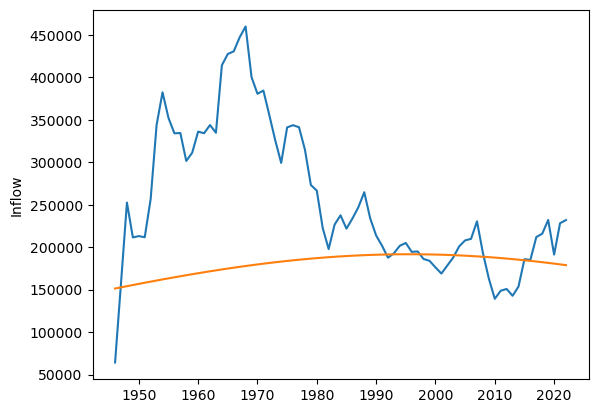

In [6]:
sns.lineplot(DSM_partial,x=DSM_partial.index,y='Inflow')
sns.lineplot(DSM_partial,x=DSM_partial.index,y='Stock change')
plt.show()

In [7]:
# hypothesis: representative period 

stock_change_mean = DSM_partial['Stock change'].mean()
print(stock_change_mean)
inflow_mean = DSM_partial['Inflow'].mean()
print(inflow_mean)

ratio_sc_inf = inflow_mean/stock_change_mean
print(ratio_sc_inf)

# for all our 1800-2022 : inflow = ratio_sc_inf*stock change

print(DSM_partial.loc[2022,'Stock change']*ratio_sc_inf)
# true value is 2022: 232,820 increase 
# calculated value is 2022: 225,685 increase 

180678.88297316935
255430.33312225144
1.4137254388504417
252909.1624529339


In [8]:
for i in np.arange(1601,2051):
    DSM.loc[i,'Inflow'] = DSM.loc[i,'Stock change']*ratio_sc_inf
    DSM.loc[i,'Outflow'] = DSM.loc[i,'Inflow']-DSM.loc[i,'Stock change']

display(DSM)

,Population,Stock,Stock per capita,Stock change,Inflow,Outflow,Stock AB,Stock MFH,Stock SFH,Stock TH
1600,2.937747e+05,1.014099e+06,3.451961,NaN,NaN,NaN,1.255182e+02,4.083741e+05,2.022826e+05,4.033166e+05
1601,2.989405e+05,1.014384e+06,3.393264,284.936764,402.822352,117.885588,0.000000e+00,4.057034e+05,2.001224e+05,4.085580e+05
1602,3.041969e+05,1.014675e+06,3.335585,290.693093,410.960220,120.267127,0.000000e+00,4.029968e+05,1.979511e+05,4.137266e+05
1603,3.095455e+05,1.014971e+06,3.278907,296.565622,419.262364,122.696742,0.000000e+00,4.003046e+05,1.957938e+05,4.188726e+05
1604,3.149880e+05,1.015274e+06,3.223213,302.556693,427.732093,125.175401,0.000000e+00,3.976270e+05,1.936505e+05,4.239961e+05
...,...,...,...,...,...,...,...,...,...,...
2046,5.536865e+07,2.916042e+07,0.526659,150096.897833,212195.802760,62098.904926,1.531559e+06,1.056326e+07,1.415238e+07,2.913227e+06
2047,5.544026e+07,2.930911e+07,0.528661,148691.824280,210209.414533,61517.590254,1.553133e+06,1.069135e+07,1.432591e+07,2.738723e+06
2048,5.551080e+07,2.945639e+07,0.530643,147277.022879,208209.273802,60932.250923,1.574817e+06,1.082002e+07,1.450014e+07,2.561412e+06
2049,5.558029e+07,2.960224e+07,0.532603,145853.239211,206196.434612,60343.195400,1.596610e+06,1.094926e+07,1.467507e+07,2.381307e+06


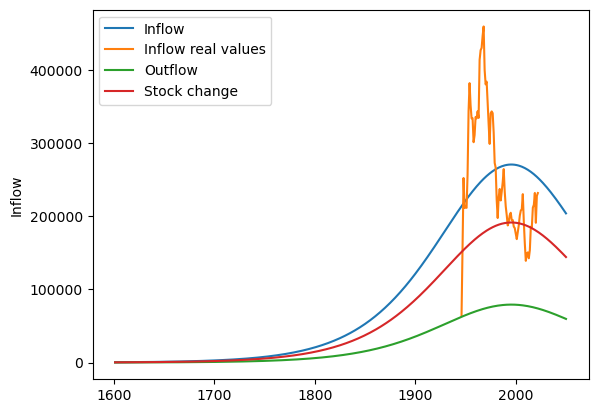

In [9]:
sns.lineplot(DSM,x=DSM.index,y='Inflow',label='Inflow')
sns.lineplot(DSM_partial,x=DSM_partial.index,y='Inflow',label='Inflow real values')
sns.lineplot(DSM,x=DSM.index,y='Outflow',label='Outflow')
sns.lineplot(DSM,x=DSM.index,y='Stock change',label='Stock change')
plt.legend()
plt.show()